<a href="https://colab.research.google.com/github/ABHAY1937/functional-programming-loops-operstions/blob/main/Diabetes_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
#uploadig file
df=pd.read_csv("/content/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#top 5 values
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#bottom 5 values
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
#print the name of columns
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
#total number of missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#full information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#seperating input and output
x=df.iloc[:,:-1].values #convert data frame to array we use "" .values ""
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
y=df.iloc[:,-1].values
y


array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [ ]:
#printing the diamension of x and y
x.ndim   #x is always two diamensional

2

In [ ]:
y.ndim # y is always become 1 D

1

In [ ]:
x.shape # total no of rows and column

(768, 8)

In [ ]:
#training data and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)
x_train

array([[0.00e+00, 1.51e+02, 9.00e+01, ..., 4.21e+01, 3.71e-01, 2.10e+01],
       [1.00e+00, 8.30e+01, 6.80e+01, ..., 1.82e+01, 6.24e-01, 2.70e+01],
       [2.00e+00, 1.22e+02, 7.00e+01, ..., 3.68e+01, 3.40e-01, 2.70e+01],
       ...,
       [4.00e+00, 9.40e+01, 6.50e+01, ..., 2.47e+01, 1.48e-01, 2.10e+01],
       [1.10e+01, 8.50e+01, 7.40e+01, ..., 3.01e+01, 3.00e-01, 3.50e+01],
       [5.00e+00, 1.36e+02, 8.20e+01, ..., 0.00e+00, 6.40e-01, 6.90e+01]])

In [ ]:
x_test

array([[1.000e+00, 1.990e+02, 7.600e+01, ..., 4.290e+01, 1.394e+00,
        2.200e+01],
       [2.000e+00, 1.070e+02, 7.400e+01, ..., 3.360e+01, 4.040e-01,
        2.300e+01],
       [4.000e+00, 7.600e+01, 6.200e+01, ..., 3.400e+01, 3.910e-01,
        2.500e+01],
       ...,
       [1.000e+00, 9.500e+01, 6.000e+01, ..., 2.390e+01, 2.600e-01,
        2.200e+01],
       [1.000e+00, 1.060e+02, 7.600e+01, ..., 3.750e+01, 1.970e-01,
        2.600e+01],
       [1.000e+01, 1.220e+02, 7.800e+01, ..., 2.760e+01, 5.120e-01,
        4.500e+01]])

In [ ]:
x_train.shape

(537, 8)

In [ ]:
x_test.shape

(231, 8)

In [ ]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [ ]:
#normalisation technique is the technique to build the machine to reading values to a single and similar range
#every datas should be in one format
#Normalisation
#1. standrad scalar

#2. min-max scalar

#3. Normalized method


In [ ]:

#1.Standrad scalar 
# equation is, z=(x-u)/s
#x=values in data
#u=mean of trainig data
#s=Standrad deviation
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train) #diamension correcting
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)
x_train


array([[-1.13311543,  0.9144385 ,  1.04559346, ...,  1.22646853,
        -0.3002719 , -1.05654479],
       [-0.8391623 , -1.19655127, -0.08570438, ..., -1.75097771,
         0.45699051, -0.55622332],
       [-0.54520916,  0.01416345,  0.01714088, ...,  0.56619802,
        -0.39305899, -0.55622332],
       ...,
       [ 0.0426971 , -0.85506763, -0.23997227, ..., -0.941212  ,
        -0.96774035, -1.05654479],
       [ 2.10036903, -1.13446334,  0.22283139, ..., -0.26848356,
        -0.51278428,  0.11087198],
       [ 0.33665024,  0.44877899,  0.63421243, ..., -4.01832171,
         0.50488062,  2.94602702]])

In [ ]:
x_test

array([[-0.85904815,  2.54476915,  0.43070305, ...,  1.53810427,
         2.84152033, -0.92178738],
       [-0.55469213, -0.39587758,  0.32564243, ...,  0.29616283,
        -0.21344264, -0.83179039],
       [ 0.0540199 , -1.38674767, -0.30472127, ...,  0.34957966,
        -0.25355832, -0.6517964 ],
       ...,
       [-0.85904815, -0.7794402 , -0.40978189, ..., -0.99919545,
        -0.6578009 , -0.92178738],
       [-0.85904815, -0.42784113,  0.43070305, ...,  0.81697698,
        -0.85220763, -0.56179941],
       [ 1.88015599,  0.08357569,  0.53576367, ..., -0.50508972,
         0.11982604,  1.14814346]])

In [ ]:
# implimenting KNN algorithms
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=7) #k=7
model.fit(x_train,y_train)
y_pred=model.predict(x_test) #x_test values are mainly similar to y test bcos these y_test is the actual output and x_test is the ML output of machine
y_pred


array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1])

In [ ]:
y_test   #we dont get exact similar values only 70% should be same for both

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [ ]:
print(model.predict([[2,150,77,30,94,29,0.23,44]]))

[1]


In [ ]:
pred=model.predict(scalar.transform([[2,100,70,30,0,30.0,0.10,34]]))
print(pred)

[0]


In [ ]:
#performance evaluation 
#Concept     =Confusion matrics
#1.ACCURACY SCORE  ----------------->used to measure the performance ,its working based on confusion matrics

#Confusion matrics ===========> performace evaluvate cheiyan vendi use cheiyuna matrics anu ath vach anu Accuraccy rate predict cheiyune
#4 TECHNICAL TERMS
#TP: TRUE POSITIVE
#TN:TRUE NEGATIVE
#FP:FALSE POSITIVE
#FN:FALSE NEGATIVE
#TP

In [ ]:
# *confusion matrix:*

# ---
# based on target it generates

# TP: true postive,
# TN:true negative,
# FP:false positive,
# FN:false negative

# *true positive:*
# actually positive>>>>>machine prediction also positive,1=>1

# *true negative:*
# actually negative>>>>>machine prediction also negative,0=>0

# *false positive:* 
# actually negative>>>>but machine prediction is positve,0=>1

# *false negatve:*
# actually psitve>>>>but machine prediction is negatve,1=>0

# *confusion matrix generation:*

#                               TP    |   FP
#                               ..............
#                               FN    |   TN

# *accuracy_score:*


#                                TP+TN
#                             ............
#                             TP+TN+FP+FN

In [ ]:
#implimenting:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
result=confusion_matrix(y_test,y_pred)
result


array([[135,  22],
       [ 33,  41]])

In [ ]:
report=classification_report(y_test,y_pred)
report

'              precision    recall  f1-score   support\n\n           0       0.80      0.86      0.83       157\n           1       0.65      0.55      0.60        74\n\n    accuracy                           0.76       231\n   macro avg       0.73      0.71      0.71       231\nweighted avg       0.75      0.76      0.76       231\n'

In [ ]:
score=accuracy_score(y_test,y_pred)
score

0.7619047619047619

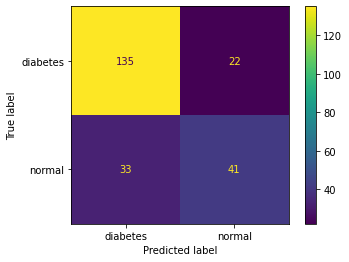

In [ ]:
#displaying confusion matrix hrough grapically
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred)
labels=["diabetes","normal"]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()